In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm


In [3]:
# first we import the data
data = pd.read_csv('/home/saad/Music/Files-02/Jupyter/higgs-boson/training.zip')

In [5]:
# let us look at the first 10 rows in the data set
data.head(10)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [7]:
# to have a quick summary statistics of the data
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [8]:

data.replace(to_replace = -999, value = np.nan, inplace = True)

In [9]:
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,349996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,...,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


In [10]:

num_cols = data.select_dtypes(include=[np.number]).columns

data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [11]:
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,...,1,46.226,0.725,1.158,47.902,-0.01,-0.002,46.226,2.233584,b
2,100002,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,...,1,44.251,2.053,-2.028,47.902,-0.01,-0.002,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,0.414,...,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,16.405,...,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,112.406,71.989,36.548,5.042,2.107,225.885,-0.244,1.392,5.042,...,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000,4.505083,b
249996,349996,112.406,58.179,68.083,22.439,2.107,225.885,-0.244,2.585,22.439,...,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,2.107,225.885,-0.244,2.390,22.183,...,1,41.992,1.800,-0.166,47.902,-0.01,-0.002,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,2.107,225.885,-0.244,3.365,13.504,...,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000,1.681611,b


In [13]:

X = data.drop(['Label', 'EventId', 'Weight'], axis=1)
X

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,47.902,-0.01,-0.002,46.226
2,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,47.902,-0.01,-0.002,44.251
3,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,0.414,75.968,...,0.060,86.062,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,-0.000
4,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,16.405,57.983,...,-0.871,53.131,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,112.406,71.989,36.548,5.042,2.107,225.885,-0.244,1.392,5.042,55.892,...,2.859,144.665,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000
249996,112.406,58.179,68.083,22.439,2.107,225.885,-0.244,2.585,22.439,50.618,...,-0.867,80.408,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,-0.000
249997,105.457,60.526,75.839,39.757,2.107,225.885,-0.244,2.390,22.183,120.462,...,-2.890,198.907,1,41.992,1.800,-0.166,47.902,-0.01,-0.002,41.992
249998,94.951,19.362,68.812,13.504,2.107,225.885,-0.244,3.365,13.504,55.859,...,0.811,112.718,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000


In [14]:

y = data["Label"].map({"s": 1, "b": 0})
y

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int64

In [15]:

weights = data['Weight'].values

In [16]:
# let us devide the data into Train/test split
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

In [17]:
len( X_train ), len( X_test )

(200000, 50000)

In [18]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
75381,148.023,15.157,82.511,220.224,1.980,277.469,0.568,1.308,7.354,392.420,...,1.995,453.509,2,208.482,-0.254,-1.126,53.015,-2.234,-2.468,261.498
65569,84.529,51.081,56.597,53.528,0.006,58.029,0.564,2.032,2.333,143.355,...,-2.272,152.517,2,39.688,0.748,0.743,36.812,0.754,2.407,76.500
163473,89.294,52.062,62.875,61.598,3.118,224.866,-0.464,2.024,17.196,175.018,...,1.775,308.406,2,66.313,-2.961,-1.309,31.535,0.157,2.791,97.848
90518,131.185,24.055,83.916,101.827,4.374,550.253,-3.858,2.031,28.394,214.639,...,1.200,266.301,2,77.917,-1.225,-0.952,48.824,3.149,-2.598,126.741
138866,425.093,82.314,134.060,195.478,1.988,253.643,-0.052,3.162,48.574,303.657,...,2.231,476.272,3,132.440,-1.962,-1.682,68.127,0.027,-0.324,231.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,74.878,43.399,55.562,24.427,2.107,225.885,-0.244,3.190,24.427,47.728,...,-0.163,174.283,0,65.561,0.000,-0.033,47.902,-0.010,-0.002,0.000
103694,142.856,56.801,96.776,56.528,2.107,225.885,-0.244,2.725,24.583,143.913,...,-1.735,186.763,1,43.948,0.015,0.875,47.902,-0.010,-0.002,43.948
131932,87.262,52.010,68.178,34.731,0.665,89.916,0.507,2.485,3.121,140.973,...,-1.583,226.589,2,56.780,0.453,3.126,34.571,1.118,0.666,91.352
146867,68.878,51.456,55.837,19.871,2.107,225.885,-0.244,1.932,19.871,66.678,...,-0.196,112.952,0,65.561,0.000,-0.033,47.902,-0.010,-0.002,-0.000


In [20]:
X_train_scaled

array([[ 5.24770287e-01, -9.63207295e-01,  3.19427849e-02, ...,
        -2.02972920e+00, -2.51344352e+00,  1.92649145e+00],
       [-6.81965048e-01,  5.20927990e-02, -6.03991082e-01, ...,
         6.98612244e-01,  2.45515547e+00,  3.53212558e-02],
       [-5.91403832e-01,  7.98182580e-02, -4.49927919e-01, ...,
         1.53491815e-01,  2.84652819e+00,  2.53554433e-01],
       ...,
       [-6.30023011e-01,  7.83486109e-02, -3.19791417e-01, ...,
         1.03098048e+00,  6.80728627e-01,  1.87148085e-01],
       [-9.79420158e-01,  6.26912160e-02, -6.22641609e-01, ...,
         1.00419036e-03, -9.68341723e-05, -7.46711632e-01],
       [-1.40023162e-01,  9.64856740e-01,  1.14373203e-01, ...,
         1.00419036e-03, -9.68341723e-05, -7.46711632e-01]])

In [21]:
len( X_train_scaled[0] )

30

In [22]:
len( X_train_scaled )

200000

In [24]:
# let us take the Logistic Regression = LR and do a fit
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
# the accuracy obtained in this training with the LR model
accuracy_score(y_test, y_pred_lr)

0.75274

In [ ]:
y_pred_lr

In [25]:

lr.predict_proba(X_test_scaled)

array([[0.65688763, 0.34311237],
       [0.67848203, 0.32151797],
       [0.80735642, 0.19264358],
       ...,
       [0.93185682, 0.06814318],
       [0.83136278, 0.16863722],
       [0.57093326, 0.42906674]])

In [26]:
# selecting the probability of the positive class
lr.predict_proba(X_test_scaled)[:,1]

array([0.34311237, 0.32151797, 0.19264358, ..., 0.06814318, 0.16863722,
       0.42906674])

In [27]:

print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))

ROC-AUC: 0.8157690506897621


In [31]:
# Predict class labels
y_pred = lr.predict(X_test_scaled)
# Predict probabilities
y_proba = lr.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (signal)


In [32]:
# fraction of correct predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
# shows counts of true positives, true negatives, false positives, false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#gives precision, recall, f1-score per class
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75274
Confusion Matrix:
 [[28542  4523]
 [ 7840  9095]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82     33065
           1       0.67      0.54      0.60     16935

    accuracy                           0.75     50000
   macro avg       0.73      0.70      0.71     50000
weighted avg       0.75      0.75      0.75     50000



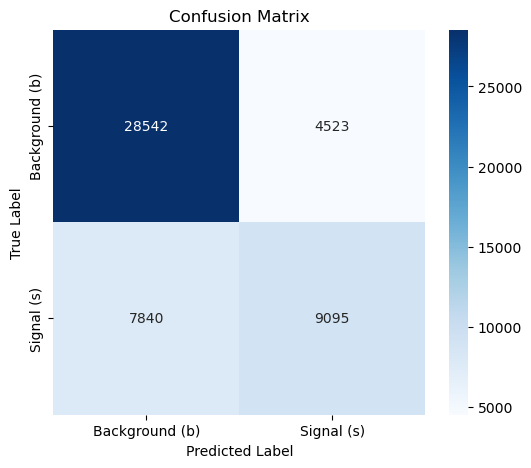

In [33]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Background (b)', 'Signal (s)']

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
28542+9095+4523+7840

50000

In [56]:
4523*100/50000.,7840*100/50000.

(9.046, 15.68)

In [37]:

y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

y_proba_lr

array([0.34311237, 0.32151797, 0.19264358, ..., 0.06814318, 0.16863722,
       0.42906674])

In [39]:


# 100 evenly spaced numbers from 0.0 to 1.0 -- are candidate thresholds
thresholds = np.linspace(0.0, 1.0, 100)
best_ams_lr = 0
best_thresh_lr = 0


for t in thresholds:
    y_pred_t = (y_proba_lr > t).astype(int)
    s = weights_test[(y_test == 1) & (y_pred_t == 1)].sum()
    b = weights_test[(y_test == 0) & (y_pred_t == 1)].sum()
    ams = np.sqrt(2 * ((s + b + 10) * np.log(1 + s / (b + 10)) - s))
    
    if ams > best_ams_lr:
        best_ams_lr = ams
        best_thresh_lr = t

print(f"Best AMS (Logistic Regression): {best_ams_lr:.4f} at threshold {best_thresh_lr:.3f}")


Best AMS (Logistic Regression): 0.9144 at threshold 0.424


In [64]:
# Predict probabilities for the test set
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Use the best AMS threshold
best_thresh_lr = 0.424
y_pred_lr_best = (y_proba_lr > best_thresh_lr).astype(int)


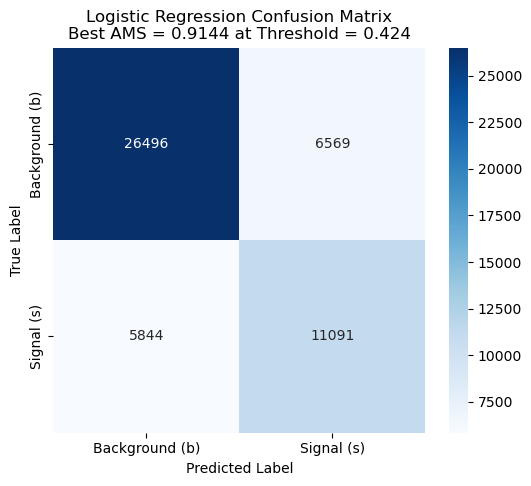

In [65]:
cm_lr = confusion_matrix(y_test, y_pred_lr_best)
labels = ['Background (b)', 'Signal (s)']
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Logistic Regression Confusion Matrix\nBest AMS = 0.9144 at Threshold = {best_thresh_lr:.3f}')
plt.show()

In [66]:
6569*100/50000.

13.138

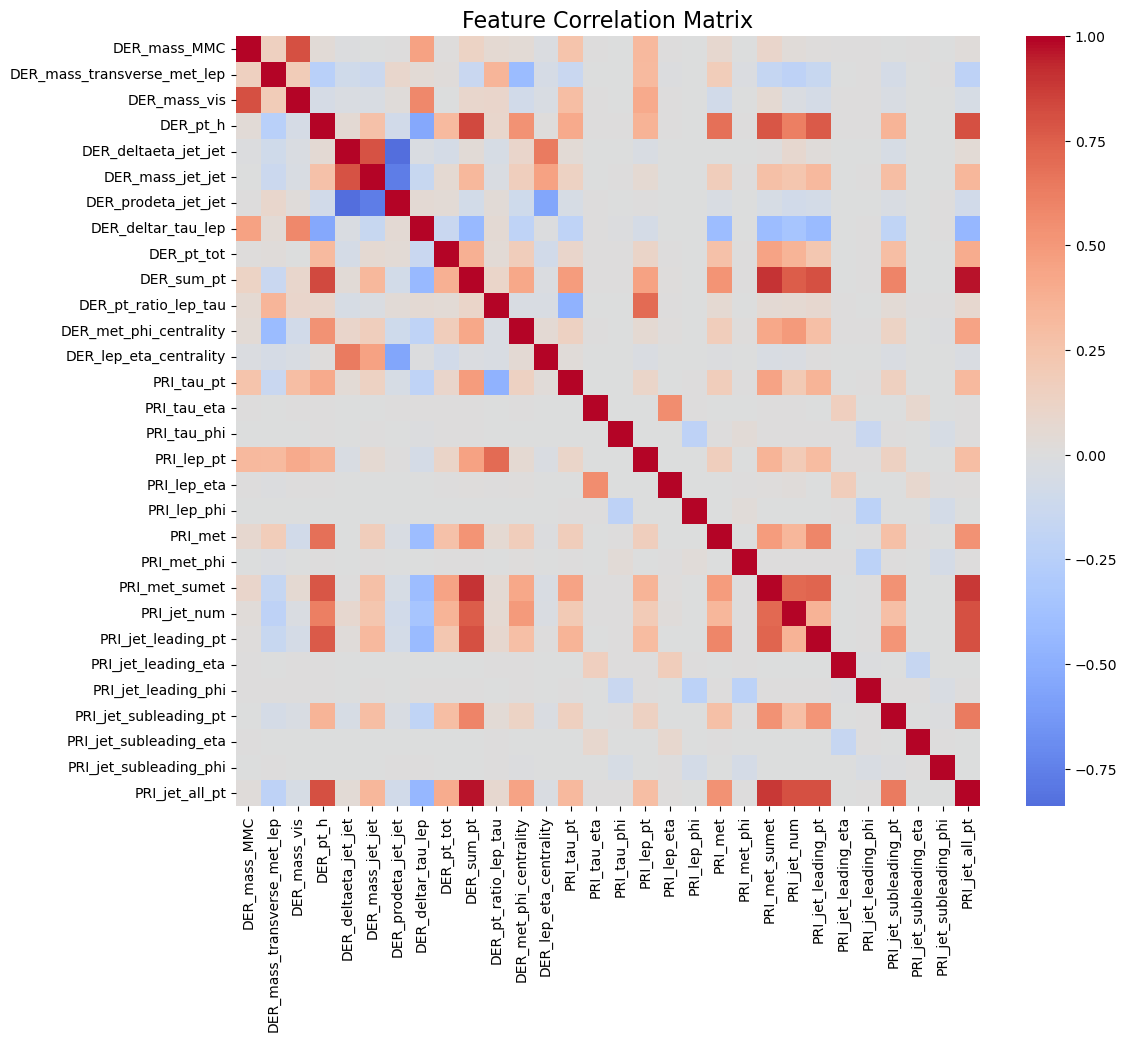

In [41]:
# compute correlations only for numeric columns
corr = X.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()


In [42]:

df_with_target = X.copy()
df_with_target["Label"] = y

corr_target = df_with_target.corr()["Label"].sort_values(ascending=False)
print(corr_target.head(10))   # top positive correlations
print(corr_target.tail(10))   # top negative correlations

Label                     1.000000
DER_met_phi_centrality    0.271752
PRI_tau_pt                0.235238
DER_mass_jet_jet          0.212495
DER_deltaeta_jet_jet      0.203472
DER_pt_h                  0.192526
DER_lep_eta_centrality    0.175145
DER_sum_pt                0.153236
PRI_met_sumet             0.135520
PRI_jet_all_pt            0.134296
Name: Label, dtype: float64
PRI_jet_leading_eta            0.000072
PRI_tau_eta                   -0.000943
PRI_jet_subleading_phi        -0.003525
PRI_tau_phi                   -0.004403
DER_mass_vis                  -0.014055
DER_pt_tot                    -0.015287
PRI_lep_pt                    -0.031948
DER_prodeta_jet_jet           -0.183613
DER_pt_ratio_lep_tau          -0.195398
DER_mass_transverse_met_lep   -0.351428
Name: Label, dtype: float64


In [44]:
# Define models (use n_jobs=-1 where supported)
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, n_jobs=-1),
    "Neural Net": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=200, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in tqdm(models.items(), desc="Models"):
    fold_scores = []
    for train_idx, test_idx in tqdm(cv.split(X, y), total=cv.get_n_splits(), desc=f"{name} folds", leave=False):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train_fold, y_train_fold)
        y_proba = model.predict_proba(X_test_fold)[:, 1]
        
        # ROC-AUC for this fold
        from sklearn.metrics import roc_auc_score
        fold_score = roc_auc_score(y_test_fold, y_proba)
        fold_scores.append(fold_score)
    
    results[name] = (np.mean(fold_scores), np.std(fold_scores))

# Print results
for name, (mean_score, std_score) in results.items():
    print(f"{name}: ROC-AUC = {mean_score:.4f} ± {std_score:.4f}")

Models: 100%|█████████████████████████████████| 5/5 [2:22:55<00:00, 1715.13s/it]

Logistic Regression: ROC-AUC = 0.8082 ± 0.0018
Random Forest: ROC-AUC = 0.8992 ± 0.0009
Gradient Boosting: ROC-AUC = 0.9090 ± 0.0008
XGBoost: ROC-AUC = 0.9108 ± 0.0010
Neural Net: ROC-AUC = 0.9054 ± 0.0015


In [46]:
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]   # predicted probability of signal

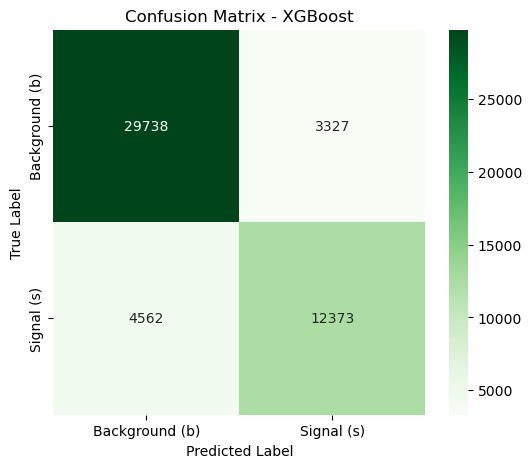

In [53]:
# Confusion Matrix for XGBoost
y_pred_xgb = xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
labels = ['Background (b)', 'Signal (s)']

plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [55]:
29738+12373+3327+4562

50000

In [57]:
3327*100/50000.,4562*100/50000.

(6.654, 9.124)

In [61]:
confusion_matrix(y_test, y_pred_xgb)

array([[29738,  3327],
       [ 4562, 12373]])

In [47]:
def ams_score(s, b, br=10.0):
    """Approximate Median Significance"""
    return np.sqrt(2 * ((s + b + br) * np.log(1.0 + s / (b + br)) - s))

In [48]:
thresholds = np.linspace(0.0, 1.0, 200)
best_ams = 0
best_thresh = 0

for t in thresholds:
    y_pred_t = (y_proba_xgb > t).astype(int)
    s = weights_test[(y_test == 1) & (y_pred_t == 1)].sum()
    b = weights_test[(y_test == 0) & (y_pred_t == 1)].sum()
    if b <= 0: 
        continue
    ams = ams_score(s, b)
    if ams > best_ams:
        best_ams = ams
        best_thresh = t

print(f"Best AMS (XGBoost): {best_ams:.4f} at threshold {best_thresh:.3f}")

Best AMS (XGBoost): 1.6519 at threshold 0.839


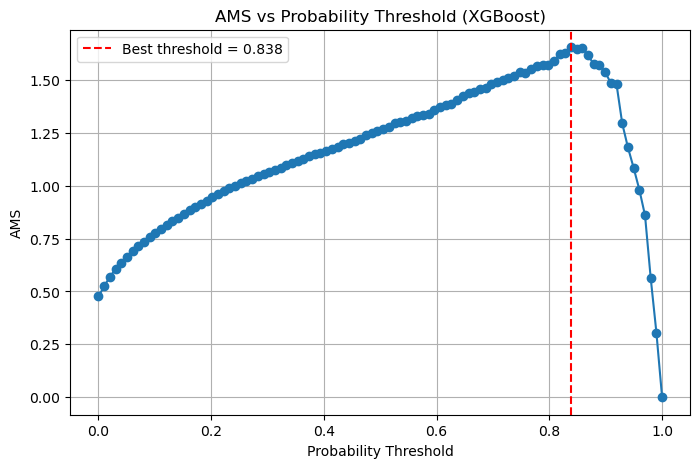

Maximum AMS = 1.6544 at threshold = 0.838


In [50]:

# Predict probabilities for test set
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.0, 1.0, 100)
ams_values = []

br = 10.0  # regularization term

for t in thresholds:
    y_pred_t = (y_proba_xgb > t).astype(int)
    s = weights_test[(y_test == 1) & (y_pred_t == 1)].sum()
    b = weights_test[(y_test == 0) & (y_pred_t == 1)].sum()
    ams = np.sqrt(2 * ((s + b + br) * np.log(1 + s / (b + br)) - s))
    ams_values.append(ams)

# Plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, ams_values, marker='o')
plt.axvline(x=thresholds[np.argmax(ams_values)], color='r', linestyle='--', label=f'Best threshold = {thresholds[np.argmax(ams_values)]:.3f}')
plt.title("AMS vs Probability Threshold (XGBoost)")
plt.xlabel("Probability Threshold")
plt.ylabel("AMS")
plt.legend()
plt.grid(True)
plt.show()

print(f"Maximum AMS = {max(ams_values):.4f} at threshold = {thresholds[np.argmax(ams_values)]:.3f}")


In [58]:
best_thresh_xgb = thresholds[np.argmax(ams_values)]
best_thresh_xgb

0.8383838383838385

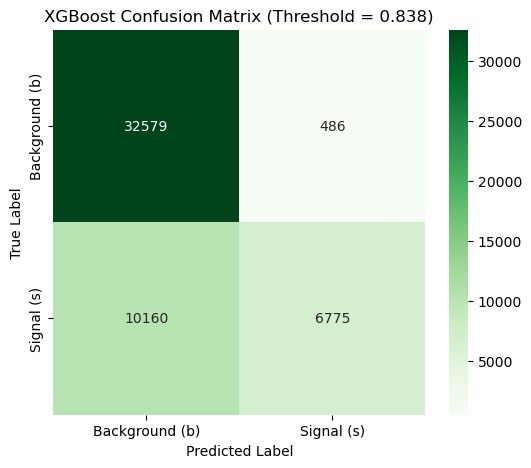

In [62]:
y_pred_xgb_best = (y_proba_xgb > best_thresh_xgb).astype(int)
cm_xgb = confusion_matrix(y_test, y_pred_xgb_best)
labels = ['Background (b)', 'Signal (s)']


plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'XGBoost Confusion Matrix (Threshold = {best_thresh_xgb:.3f})')
plt.show()

In [63]:
confusion_matrix(y_test, y_pred_xgb_best)

array([[32579,   486],
       [10160,  6775]])

In [67]:
486*100/50000

0.972